In [15]:
import pandas as pd
import numpy as np


Se imprime el dataframe cargado desde github

In [16]:
csv_mortalidad= "https://raw.githubusercontent.com/JoelPerezD/analisisPandas/main/Copia%20de%20mortalidad_materna_2002_2022.csv"
df_mortalidad = pd.read_csv(csv_mortalidad, encoding='unicode_escape')
df_mortalidad

,ANIO_NACIMIENTO,MES_NACIMIENTO,MES_NACIMIENTOD,DIA_NACIMIENTO,EDAD,ESTADO_CONYUGAL,ESTADO_CONYUGALD,ENTIDAD_RESIDENCIA,ENTIDAD_RESIDENCIAD,MUNICIPIO_RESIDENCIA,...,DIA_REGISTRO,ANIO_CERTIFICACION,MES_CERTIFICACION,MES_CERTIFICACIOND,DIA_CERTIFICACION,ANIO_BASE_DATOS,RAZON_MORTALIDAD_MATERNA,RAZON_MORTALIDAD_MATERNAD,EDAD_QUINQUENAL,EDAD_QUINQUENALD
0,1967,5,MAYO,4,35,1,SOLTERO,16,MICHOAC?N DE OCAMPO,104,...,15,0,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZ?N DE MO...,6,35 a 39 a¤os
1,1965,0,NO ESPECIFICADO,0,37,5,CASADO,20,OAXACA,41,...,9,0,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZ?N DE MO...,6,35 a 39 a¤os
2,1956,2,FEBRERO,4,46,5,CASADO,12,GUERRERO,1,...,2,0,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZ?N DE MO...,8,45 a 49 a¤os
3,1980,9,SEPTIEMBRE,3,22,5,CASADO,28,TAMAULIPAS,38,...,27,0,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZ?N DE MO...,3,20 a 24 a¤os
4,1947,12,DICIEMBRE,20,54,5,CASADO,27,TABASCO,3,...,22,0,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZ?N DE MO...,9,50 a 54 a¤os
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23273,2004,9,SEPTIEMBRE,4,18,4,UNION LIBRE,14,JALISCO,98,...,22,2022,11,NOVIEMBRE,20,2022,1,MUERTES MATERNAS PARA LA RAZ?N DE MORTALIDAD M...,2,15 a 19 a¤os
23274,1993,4,ABRIL,15,29,4,UNION LIBRE,22,QUERTARO,14,...,13,2022,11,NOVIEMBRE,13,2022,1,MUERTES MATERNAS PARA LA RAZ?N DE MORTALIDAD M...,4,25 a 29 a¤os
23275,2000,8,AGOSTO,18,22,4,UNION LIBRE,29,TLAXCALA,15,...,6,2022,9,SEPTIEMBRE,1,2022,1,MUERTES MATERNAS PARA LA RAZ?N DE MORTALIDAD M...,3,20 a 24 a¤os
23276,1998,5,MAYO,12,24,0,SE IGNORA,30,VERACRUZ DE IGNACIO DE LA LLAVE,8,...,18,2022,5,MAYO,13,2022,1,MUERTES MATERNAS PARA LA RAZ?N DE MORTALIDAD M...,3,20 a 24 a¤os


In [22]:
# observamos las variables y tipo de datos por lo que me di cuenta que no serie sencillo ya que fecha, mes y anio estaban separados y eran int
df_mortalidad.describe()
df_mortalidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23278 entries, 0 to 23277
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ANIO_NACIMIENTO            23278 non-null  int64 
 1   MES_NACIMIENTO             23278 non-null  int64 
 2   MES_NACIMIENTOD            23278 non-null  object
 3   DIA_NACIMIENTO             23278 non-null  int64 
 4   EDAD                       23278 non-null  int64 
 5   ESTADO_CONYUGAL            23278 non-null  int64 
 6   ESTADO_CONYUGALD           23278 non-null  object
 7   ENTIDAD_RESIDENCIA         23278 non-null  int64 
 8   ENTIDAD_RESIDENCIAD        23278 non-null  object
 9   MUNICIPIO_RESIDENCIA       23278 non-null  int64 
 10  MUNICIPIO_RESIDENCIAD      23278 non-null  object
 11  LOCALIDAD_RESIDENCIA       23278 non-null  int64 
 12  LOCALIDAD_RESIDENCIAD      23278 non-null  object
 13  TAMANIO_LOCALIDAD          23278 non-null  int64 
 14  TAMANI

In [63]:
# Motramos los datos mas importantes
df_mortalidad['fecha'] = df_mortalidad['ANIO_DEFUNCION'].astype(str) + '-' + df_mortalidad['MES_DEFUNCION'].astype(str).str.zfill(2) + '-' + df_mortalidad['DIA_DEFUNCION'].astype(str).str.zfill(2)
df_mortalidad['fecha'] = pd.to_datetime(df_mortalidad['fecha'], format='%Y-%m-%d', errors='coerce')

# Convertir la columna fecha en el índice del DataFrame
df_mortalidad.set_index('fecha', inplace=True)
df_mortalidad

,ANIO_NACIMIENTO,MES_NACIMIENTO,MES_NACIMIENTOD,DIA_NACIMIENTO,EDAD,ESTADO_CONYUGAL,ESTADO_CONYUGALD,ENTIDAD_RESIDENCIA,ENTIDAD_RESIDENCIAD,MUNICIPIO_RESIDENCIA,...,DIA_REGISTRO,ANIO_CERTIFICACION,MES_CERTIFICACION,MES_CERTIFICACIOND,DIA_CERTIFICACION,ANIO_BASE_DATOS,RAZON_MORTALIDAD_MATERNA,RAZON_MORTALIDAD_MATERNAD,EDAD_QUINQUENAL,EDAD_QUINQUENALD
fecha,,,,,,,,,,,,,,,,,,,,,
2002-07-11,1967,5,MAYO,4,35,1,SOLTERO,16,MICHOAC?N DE OCAMPO,104,...,15,0,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZ?N DE MO...,6,35 a 39 a¤os
2002-07-08,1965,0,NO ESPECIFICADO,0,37,5,CASADO,20,OAXACA,41,...,9,0,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZ?N DE MO...,6,35 a 39 a¤os
2002-08-01,1956,2,FEBRERO,4,46,5,CASADO,12,GUERRERO,1,...,2,0,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZ?N DE MO...,8,45 a 49 a¤os
2002-10-13,1980,9,SEPTIEMBRE,3,22,5,CASADO,28,TAMAULIPAS,38,...,27,0,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZ?N DE MO...,3,20 a 24 a¤os
2002-03-22,1947,12,DICIEMBRE,20,54,5,CASADO,27,TABASCO,3,...,22,0,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZ?N DE MO...,9,50 a 54 a¤os
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-20,2004,9,SEPTIEMBRE,4,18,4,UNION LIBRE,14,JALISCO,98,...,22,2022,11,NOVIEMBRE,20,2022,1,MUERTES MATERNAS PARA LA RAZ?N DE MORTALIDAD M...,2,15 a 19 a¤os
2022-11-12,1993,4,ABRIL,15,29,4,UNION LIBRE,22,QUERTARO,14,...,13,2022,11,NOVIEMBRE,13,2022,1,MUERTES MATERNAS PARA LA RAZ?N DE MORTALIDAD M...,4,25 a 29 a¤os
2022-08-31,2000,8,AGOSTO,18,22,4,UNION LIBRE,29,TLAXCALA,15,...,6,2022,9,SEPTIEMBRE,1,2022,1,MUERTES MATERNAS PARA LA RAZ?N DE MORTALIDAD M...,3,20 a 24 a¤os


In [64]:
sonora = df_mortalidad[(df_mortalidad['ENTIDAD_RESIDENCIAD'] == 'SONORA')]
sonora

,ANIO_NACIMIENTO,MES_NACIMIENTO,MES_NACIMIENTOD,DIA_NACIMIENTO,EDAD,ESTADO_CONYUGAL,ESTADO_CONYUGALD,ENTIDAD_RESIDENCIA,ENTIDAD_RESIDENCIAD,MUNICIPIO_RESIDENCIA,...,DIA_REGISTRO,ANIO_CERTIFICACION,MES_CERTIFICACION,MES_CERTIFICACIOND,DIA_CERTIFICACION,ANIO_BASE_DATOS,RAZON_MORTALIDAD_MATERNA,RAZON_MORTALIDAD_MATERNAD,EDAD_QUINQUENAL,EDAD_QUINQUENALD
fecha,,,,,,,,,,,,,,,,,,,,,
2002-03-18,1970,12,DICIEMBRE,14,31,4,UNION LIBRE,26,SONORA,29,...,18,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZ?N DE MORTALIDAD M...,5,30 a 34 a¤os
2002-10-25,1982,6,JUNIO,6,20,4,UNION LIBRE,26,SONORA,18,...,25,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZ?N DE MORTALIDAD M...,3,20 a 24 a¤os
2002-12-20,1969,2,FEBRERO,22,33,5,CASADO,26,SONORA,18,...,20,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZ?N DE MORTALIDAD M...,5,30 a 34 a¤os
2002-11-21,1972,4,ABRIL,5,30,1,SOLTERO,26,SONORA,12,...,22,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZ?N DE MORTALIDAD M...,5,30 a 34 a¤os
2002-10-24,1984,1,ENERO,30,18,4,UNION LIBRE,26,SONORA,29,...,25,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZ?N DE MORTALIDAD M...,2,15 a 19 a¤os
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04,1991,5,MAYO,27,31,1,SOLTERO,26,SONORA,30,...,7,2022,12,DICIEMBRE,4,2022,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZ?N DE MO...,5,30 a 34 a¤os
2022-11-30,1997,12,DICIEMBRE,14,24,4,UNION LIBRE,26,SONORA,18,...,5,2022,11,NOVIEMBRE,30,2022,1,MUERTES MATERNAS PARA LA RAZ?N DE MORTALIDAD M...,3,20 a 24 a¤os
2022-09-03,1990,10,OCTUBRE,25,31,4,UNION LIBRE,26,SONORA,42,...,7,2022,9,SEPTIEMBRE,3,2022,1,MUERTES MATERNAS PARA LA RAZ?N DE MORTALIDAD M...,5,30 a 34 a¤os


In [65]:
# las columnas ya tenian un valor y significado por lo que no fue necesario modificarr los valores de las variables cualitativas 

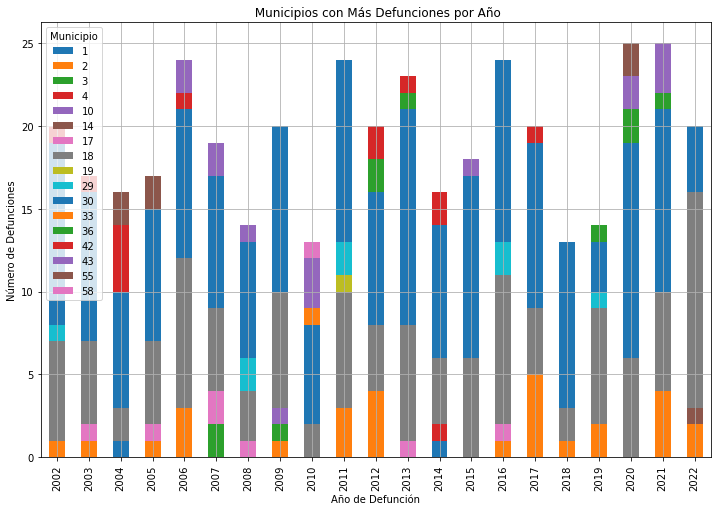

In [69]:
import matplotlib.pyplot as plt
defunciones_por_municipio_y_anio = sonora.groupby(['MUNICIPIO_REGISTRO', 'ANIO_DEFUNCION']).size().reset_index(name='Total')
top_municipios = defunciones_por_municipio_y_anio.groupby('ANIO_DEFUNCION').apply(lambda x: x.sort_values('Total', ascending=False).head(5))
fig, ax = plt.subplots(figsize=(12, 8))
df_pivot = top_municipios.pivot(index='ANIO_DEFUNCION', columns='MUNICIPIO_REGISTRO', values='Total')
# Graficar
df_pivot.plot(kind='bar', stacked=True, ax=ax)
plt.title(' Municipios con Más Defunciones por Año')
plt.xlabel('Año de Defunción')
plt.ylabel('Número de Defunciones')
plt.legend(title='Municipio')
plt.grid(True)

plt.show()

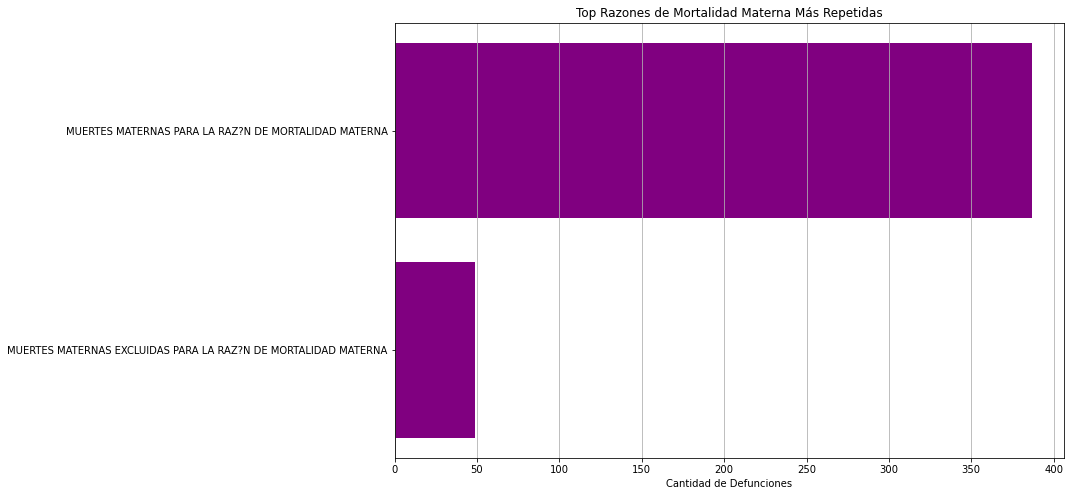

In [70]:
razones_mortalidad = sonora['RAZON_MORTALIDAD_MATERNAD'].value_counts().reset_index()
razones_mortalidad.columns = ['Razon de Mortalidad Materna', 'Cantidad']
top_razones = razones_mortalidad.head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_razones['Razon de Mortalidad Materna'], top_razones['Cantidad'], color='purple')
plt.xlabel('Cantidad de Defunciones')
plt.title('Top Razones de Mortalidad Materna Más Repetidas')
plt.gca().invert_yaxis()  # Para que la razón con más defunciones esté en la parte superior
plt.grid(axis='x')
plt.show()

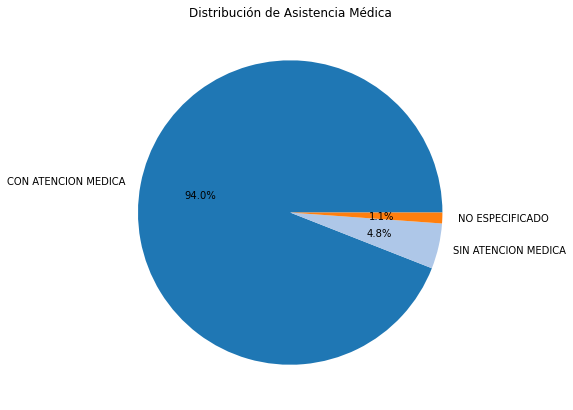

In [71]:
conteo_asistencia = sonora['ASISTENCIA_MEDICAD'].value_counts()
etiquetas = conteo_asistencia.index
tamaños = conteo_asistencia.values
plt.figure(figsize=(10, 7))
plt.pie(tamaños, labels=etiquetas, autopct='%1.1f%%', colors=plt.get_cmap('tab20')(range(len(etiquetas))))
plt.title('Distribución de Asistencia Médica')
plt.show()

In [ ]:
#podemos sacar conclusiones de que l